## SVD

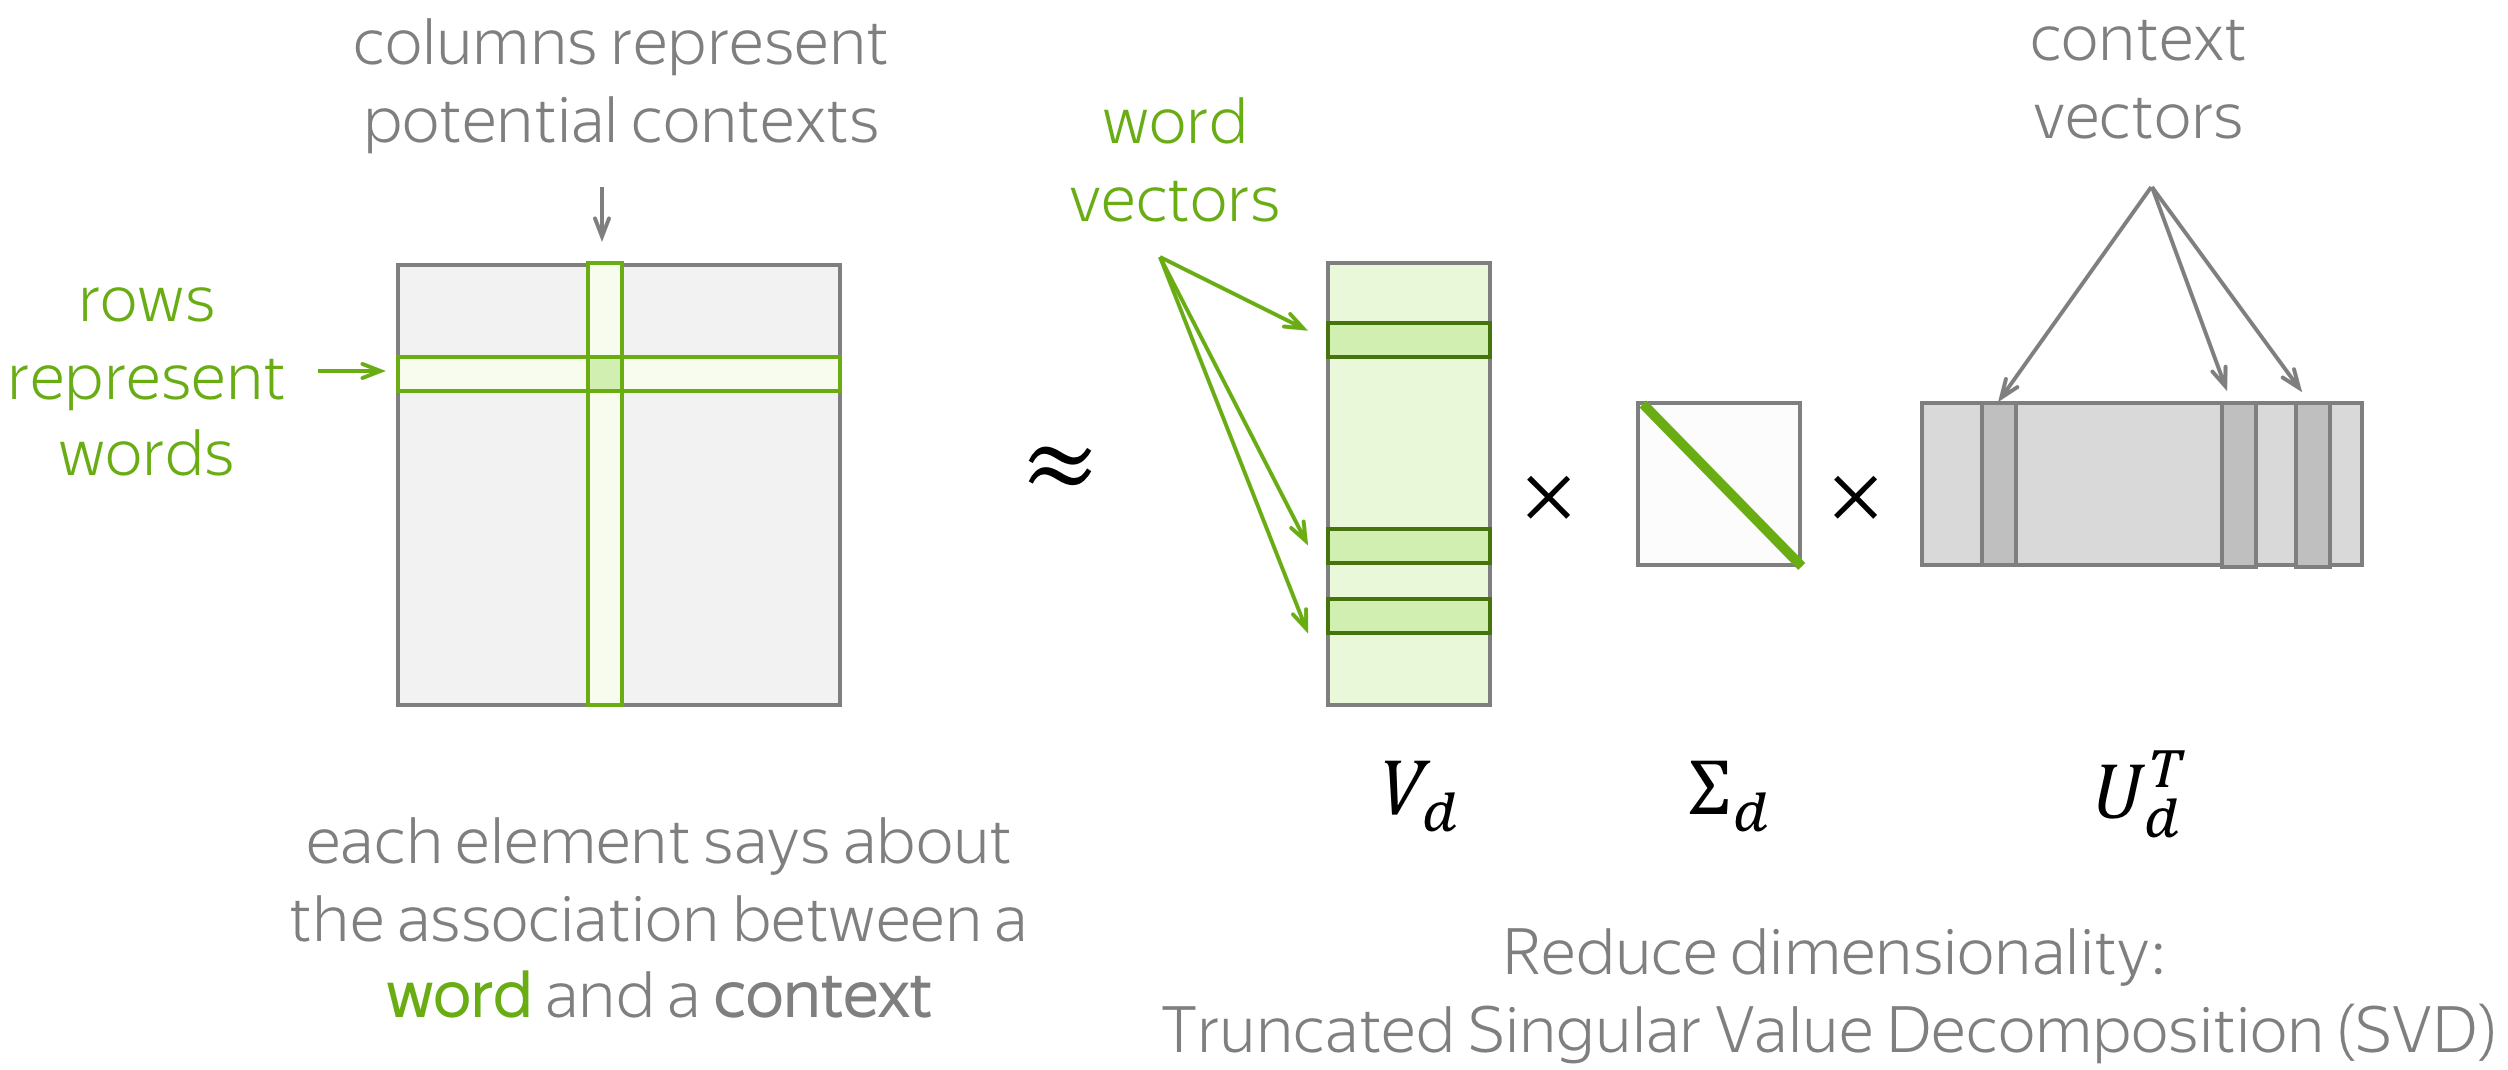

### CountVectorizer + TruncatedSVD

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.rcParams["figure.figsize"] = (12, 8)

In [ ]:
data = fetch_20newsgroups()
text_categories = data.target_names
train_data = fetch_20newsgroups(subset="train", categories=text_categories)
test_data = fetch_20newsgroups(subset="test", categories=text_categories)

In [ ]:
%%time

model = make_pipeline(
    CountVectorizer(stop_words="english", max_df=0.7),
    TruncatedSVD(n_components=256, n_iter=25, random_state=2023), 
    LogisticRegression(),
)
model.fit(train_data.data, train_data.target)
predicted_categories = model.predict(test_data.data)

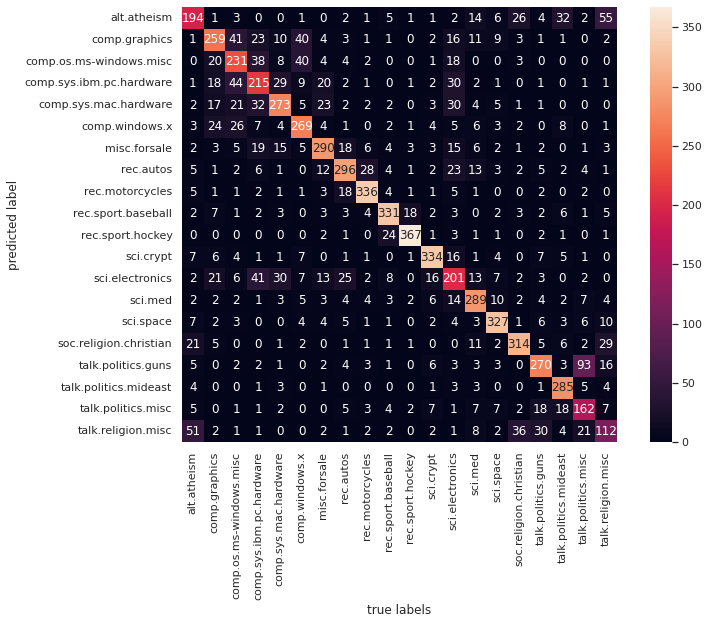

In [ ]:
mat = confusion_matrix(test_data.target, predicted_categories)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", xticklabels=train_data.target_names, yticklabels=train_data.target_names)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

In [ ]:
print(classification_report(test_data.target, predicted_categories))

              precision    recall  f1-score   support

           0       0.55      0.61      0.58       319
           1       0.61      0.67      0.63       389
           2       0.63      0.59      0.61       394
           3       0.57      0.55      0.56       392
           4       0.65      0.71      0.68       385
           5       0.73      0.68      0.70       395
           6       0.72      0.74      0.73       390
           7       0.72      0.75      0.73       396
           8       0.88      0.84      0.86       398
           9       0.83      0.83      0.83       397
          10       0.91      0.92      0.91       399
          11       0.84      0.84      0.84       396
          12       0.50      0.51      0.51       393
          13       0.78      0.73      0.76       396
          14       0.84      0.83      0.84       394
          15       0.78      0.79      0.78       398
          16       0.65      0.74      0.69       364
          17       0.92    

In [ ]:
train_data.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [ ]:
count_vectors = model['countvectorizer'].transform(train_data.data[0:3])
count_vectors.shape

(3, 129793)

In [ ]:
svd_vectors = model['truncatedsvd'].transform(count_vectors)
print(svd_vectors.shape)

(3, 256)


In [ ]:
svd_vectors[0][:15]

array([ 7.80124596e-04,  1.13765394e-01,  1.59513871e+00, -1.37386619e-01,
       -1.03836660e-01, -7.82966078e-02, -1.09414331e-01, -6.50686934e-01,
       -5.80552556e-01,  4.20441408e-01, -1.05306428e+00,  5.33549701e-03,
        3.45157358e-01,  7.21570076e-01, -3.20268682e-02])

### PPMI (Positive Pointwise Mutual Information)

В качестве исходной матрицы можно брать не только words counts в каком-то окне.

PPMI опирается на интуицию, что лучший способ измерить связь между двумя словами заключается в том, чтобы посчитать, как часто два слова встречаются в корпусе вместе, чем поотдельности:

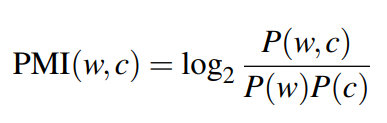




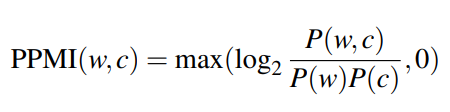

### LSA

LSA - Latent Semantic Analysis

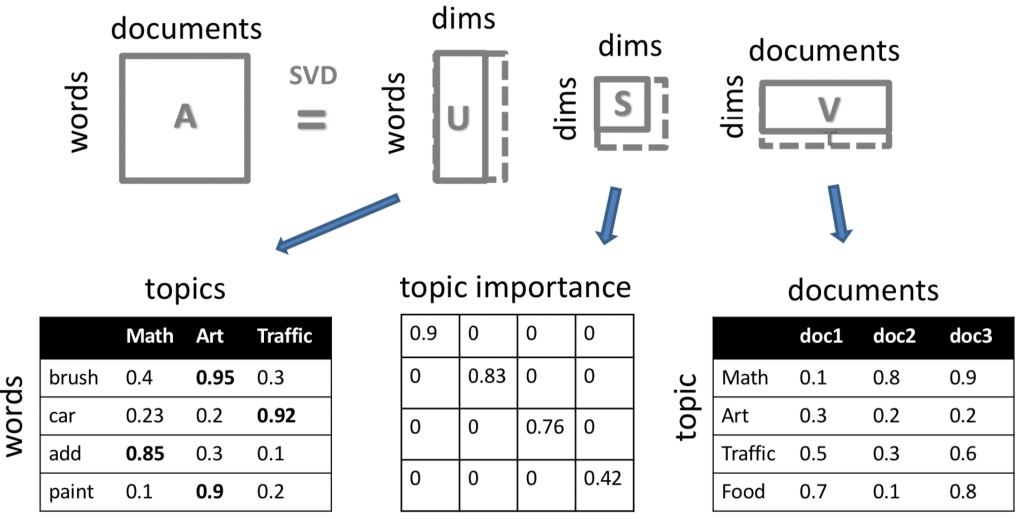

## Word2Vec

### SkipGram & CBOW

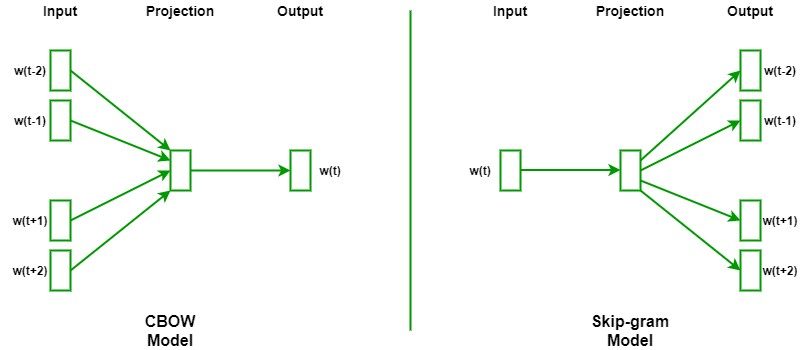

### Методы сокращения перебора

Проблема - в самом простом варианте вычисление softmax требует каждый раз прохода по всему словарю

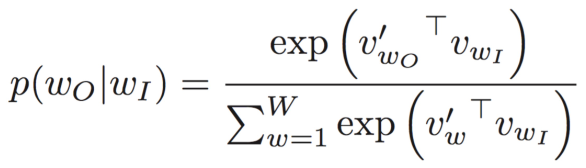


#### Negative sampling

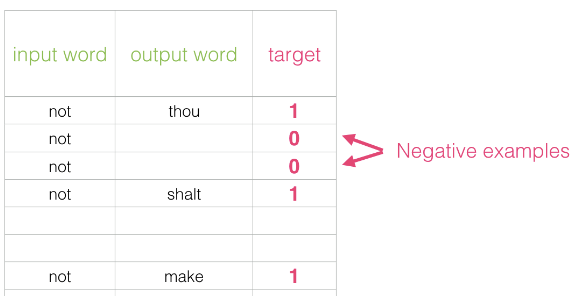

Суть этого подхода заключается в том, что мы максимизируем вероятность встречи для нужного слова в типичном контексте (том, который часто встречается в нашем корпусе) и одновременно минимизируем вероятность встречи в нетипичном контексте (том, который редко или вообще не встречается). 

Objective function:

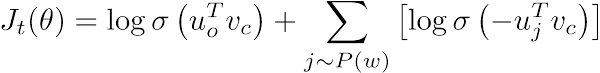

#### Hierarchical softmax

Вместо обычного softmax на последнем слое строим бинарное дерево (дерево Хаффмана). 
Каждому слову можно сопоставить бинарный код:

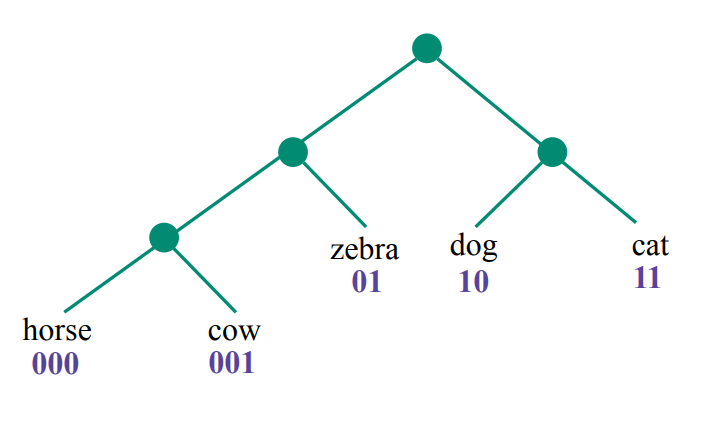


Выразим вероятность слова как произведение бинарных вероятностей вдоль пути от корня до вершины


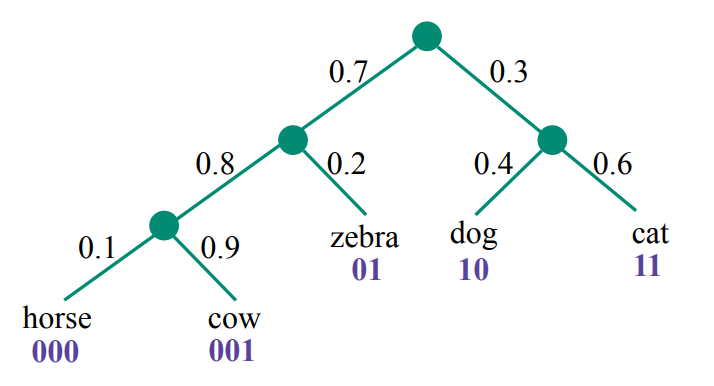

Как получить эти вероятности?

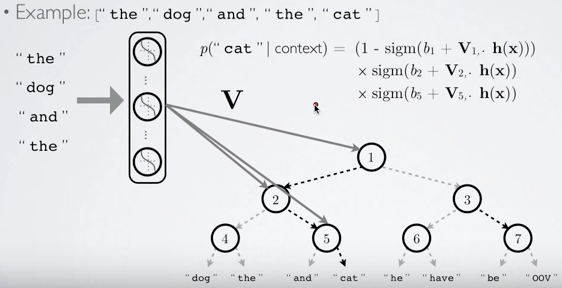

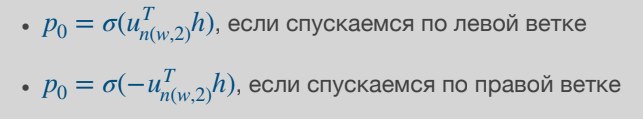

h - усредненный вектор контекста, если CBOW, или центральный вектор, если SkipGram 

При использовании простого softmax для подсчета вероятности слова, приходилось вычислять нормирующую сумму по всем словам из словаря, требовалось O(V) операций. 

Теперь же вероятность слова можно вычислить при помощи последовательных вычислений, которые требуют O(log(V))

### Эвристики для улучшения качества

- учет биграмм
- снижения веса частых слов: можно предположить (где-то это уже было...), что частотные слова менее информативны, давайте будем просто игнорировать слова при обучении с вероятностью

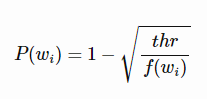

### Gensim

[Gensim](https://radimrehurek.com/gensim/index.html) – библиотека обработки естественного языка предназначения для «Тематического моделирования». С его помощью можно обрабатывать тексты, работать с векторными моделями слов (такими как Word2Vec, FastText и т. д.) и создавать тематические модели текстов

In [ ]:
import gensim.downloader as api
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

`word2vec-ruscorpora-300` - word2vec обученный на Russian National Corpus (~ 250M слов), SkipGram с окном 10

В модели "word2vec-ruscorpora-300" после слова указывается часть речи: NOUN (существительное), ADJ (прилагательное) и так далее.

[Расшифровка POS-тегов](https://yandex.ru/dev/mystem/doc/grammemes-values.html/#grammemes-values__parts)

[Другие предобученные эмбеддинги gensim](https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models)

[Репозиторий gensim-data](https://github.com/RaRe-Technologies/gensim-data)

In [ ]:
wv = api.load('word2vec-ruscorpora-300')

[=================================================-] 99.3% 197.5/198.8MB downloaded


In [ ]:
word_vector = wv['человек']
word_vector.shape

KeyError: ignored

In [ ]:
word_vector = wv['человек_NOUN']
word_vector.shape

(300,)

In [ ]:
wv.most_similar(positive=['человек_NOUN', 'компьютер_NOUN'], topn=5)

[('компьютерный_ADJ', 0.591947615146637),
 ('программист_NOUN', 0.5713083744049072),
 ('ноутбук_NOUN', 0.5553575158119202),
 ('пользователь_NOUN', 0.5512850880622864),
 ('интернет_NOUN', 0.5506680011749268)]

In [ ]:
wv.most_similar(positive=['королева_NOUN'], negative=['женщина_NOUN'], topn=5)

[('король_NOUN', 0.4940599501132965),
 ('королевский_ADJ', 0.4431174397468567),
 ('саксен::кобург_NOUN', 0.371537983417511),
 ('принц::уэльский_NOUN', 0.36908257007598877),
 ('королевство_NOUN', 0.3571174144744873)]

In [ ]:
print(wv.doesnt_match(['январь_NOUN', 'февраль_NOUN', 'март_NOUN', 'апрель_NOUN', 'собака_NOUN']))

собака_NOUN


### Обучение своих SkipGram эмбеддингов с Gensim

[Gensim Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec)

Загрузим данные из Corus и пайплайн обработки из Spacy

In [ ]:
!wget https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.0/lenta-ru-news.csv.gz

In [ ]:
!pip install corus

In [ ]:
!python3 -m spacy download ru_core_news_sm

In [ ]:
import gensim.models
from corus import load_lenta
import spacy
import string

In [ ]:
path = 'lenta-ru-news.csv.gz'
records = load_lenta(path)
data = [next(records).text for i in range(10000)]

In [ ]:
nlp = spacy.load("ru_core_news_sm")

In [ ]:
%%time

res = []

for doc in nlp.pipe(data):
    res.append([token.lemma_ for token in doc if token.lemma_ not in string.punctuation and not token.is_stop])
res[0]

CPU times: user 21min 2s, sys: 4.19 s, total: 21min 6s
Wall time: 21min 37s


['вице',
 'премьер',
 'социальный',
 'вопрос',
 'татьяна',
 'голиков',
 'рассказать',
 'какой',
 'регион',
 'россия',
 'зафиксировать',
 'высокий',
 'смертность',
 'рак',
 'сообщать',
 'риа',
 'новость',
 'слово',
 'голиков',
 'онкологический',
 'заболевание',
 'становиться',
 'причина',
 'смерть',
 'псковский',
 'тверской',
 'тульский',
 'орловский',
 'область',
 'севастополь',
 'вице',
 'премьер',
 'напомнить',
 'главный',
 'фактор',
 'смертность',
 'россия',
 '—',
 'рак',
 'болезнь',
 'система',
 'кровообращение',
 'год',
 'известный',
 'смертность',
 'онкологический',
 'заболевание',
 'россиянин',
 'снизиться',
 'впервые',
 'три',
 'год',
 'данным',
 'росстата',
 '2017',
 'год',
 'рак',
 'умереть',
 '289',
 'тысяча',
 'человек',
 '3,5',
 'процент',
 'год']

In [ ]:
%%time

model = gensim.models.Word2Vec(
    sentences=res, 
    size=256, # vector_size, default = 100
    window=7, # default = 5
    min_count=10, 
    sg=1, # Training algorithm: 1 for skip-gram; otherwise CBOW
    hs=0, #  If 1, hierarchical softmax will be used for model training. If 0, and negative is non-zero, negative sampling will be used.
    negative=5, # If > 0, negative sampling will be used, if set to 0, no negative sampling is used.
    iter=25, # epochs, Number of iterations (epochs) over the corpus
    seed=2023,
)

CPU times: user 9min 39s, sys: 1.14 s, total: 9min 40s
Wall time: 5min 42s


In [ ]:
model.wv.most_similar(positive=['апрель'], topn=5)

[('май', 0.4319768249988556),
 ('год', 0.40583616495132446),
 ('июнь', 0.3925182521343231),
 ('июль', 0.39032959938049316),
 ('2008-го', 0.3697777986526489)]

In [ ]:
model.wv.most_similar(positive=['человек'], topn=5)

[('аметова', 0.46224862337112427),
 ('погибать', 0.4488362967967987),
 ('цунами', 0.40886086225509644),
 ('camp', 0.3824569582939148),
 ('молодой', 0.3697586953639984)]

In [ ]:
model.wv.most_similar(positive=['россия'], topn=5)

[('российский', 0.4861729145050049),
 ('рф', 0.4819301962852478),
 ('страна', 0.4193841218948364),
 ('арсен', 0.40835705399513245),
 ('украина', 0.3975813388824463)]

#### Стандартный setup модели

- SkipGram + Negative Sampling
- Negative Samples - 15-20 если много данных, 2-5, если мало
- Размерность вектора 300
- Размер окна - 5-10 (большой размер окна - тематическое сходство, маленький - функциональное сходство)


### Связь с SVD

В пределе SGNS  сходится к SVD над PPMI - [Neural Word Embedding
as Implicit Matrix Factorization](https://proceedings.neurips.cc/paper/2014/file/feab05aa91085b7a8012516bc3533958-Paper.pdf)

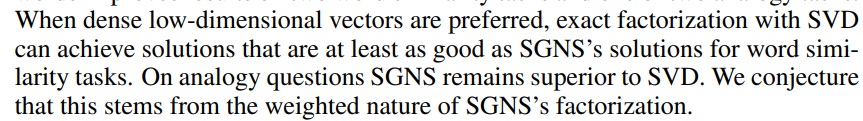

## GloVe

[GloVe: Global Vectors for Word Representation](https://nlp.stanford.edu/projects/glove/)

[GloVe original repo](https://github.com/stanfordnlp/GloVe)

[Оригинальная статья](https://nlp.stanford.edu/pubs/glove.pdf)

Модель GloVe представляет собой комбинацию методов, основанных на подсчете, и word2vec:
- считаем глобальные статистики по корпусу - составляем матрицу совпадения слов, которая показывает, как часто слова встречаются друг с другом в данном корпусе

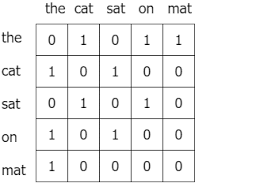

- учим вектора с учетом loss function:

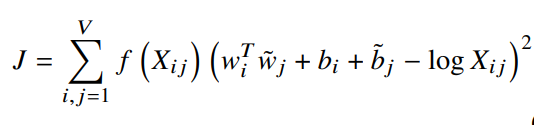

f - weighting function для редких со-встречаемостей:

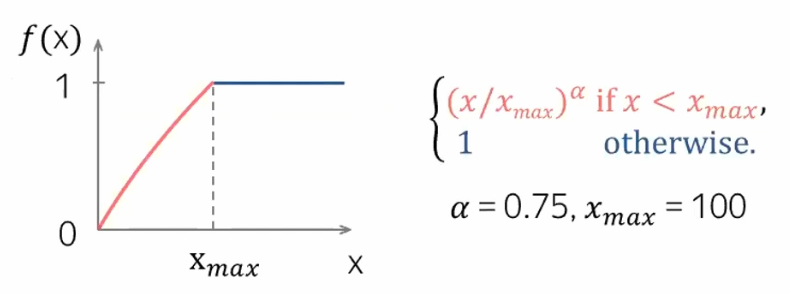

### Обучим свою GloVe-модель

[glove_python](https://github.com/maciejkula/glove-python) - toy implementation

In [ ]:
!pip install glove-python-binary

In [ ]:
from glove import Corpus, Glove

In [ ]:
%%time

corpus = Corpus() 
corpus.fit(res, window=7)
glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
glove.save('glove.model')

Performing 30 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
CPU times: user 7min 18s, sys: 825 ms, total: 7min 19s
Wall time: 4min 23s


In [ ]:
glove.most_similar('апрель')

[('февраль', 0.8486991801530857),
 ('2017', 0.834773844348599),
 ('5:02', 0.7991317025541173),
 ('2016', 0.7971475078719908)]

In [ ]:
glove.most_similar('человек')

[('дипломант', 0.9272167111489965),
 ('икс', 0.90096809657369),
 ('молодой', 0.8741057246276033),
 ('вежливый', 0.854320948047019)]

In [ ]:
glove.most_similar('россия')

[('сезоне-2016/2017', 0.7574392036089247),
 ('трезвый', 0.7203873656592249),
 ('умвд', 0.6922207082960297),
 ('шпионить', 0.6848313467547338)]

## Проблемы Word2Vec и GloVe

- не учитывается морфология
- проблема с OOV (out of vocabulary) словами, но можно добавить `<unk>`

## FastText

- Слова разбиваются на n-grams

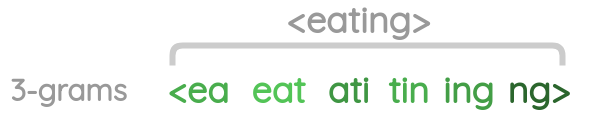

- Вектора для n-gramm обучаются с помощью Skip-gram / CBOW
- Вектор слова - усреднение векторов n-gram

[FastText](https://fasttext.cc/)

**hashing trick**:  n-gram очень много, поэтому зафиксируем максимум векторов, которые хотим обучать, сделаем хэш-таблицу, куда смаппим все n-gram'ы

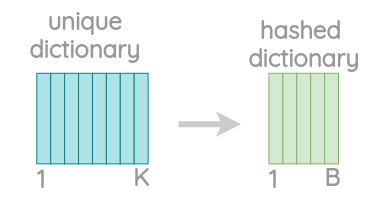

### Обучим свою FastText-модель

In [ ]:
!pip install fasttext

In [ ]:
with open('data.txt', 'w') as f:
  f.writelines(data)

In [ ]:
import fasttext

In [ ]:
fasttext.train_unsupervised??

In [ ]:
%%time

model = fasttext.train_unsupervised('data.txt', wordNgrams=3, dim=300)

CPU times: user 14min 2s, sys: 3.34 s, total: 14min 5s
Wall time: 14min 10s


In [ ]:
model.words[100:110]

['будут',
 'них',
 'После',
 'передает',
 'данным',
 'бы',
 'страны',
 'если',
 'двух',
 'чем']

In [ ]:
model.get_word_vector("россия")[:15]

array([-0.08810738, -0.48922315, -0.2033641 ,  0.4265085 , -0.0983378 ,
        0.23393883, -0.38350183, -0.07021973, -0.00275396,  0.42439485,
       -0.2995641 ,  0.12869366,  0.31806052, -0.16998431,  0.5446321 ],
      dtype=float32)

In [ ]:
model.get_nearest_neighbors('россия')

[(0.8489921689033508, 'россиянок'),
 (0.8484894633293152, 'россиянок.'),
 (0.8402353525161743, 'россиян.'),
 (0.8341452479362488, 'россияне'),
 (0.8126148581504822, 'россиянки'),
 (0.8125166296958923, 'россиян'),
 (0.80893474817276, 'россиян,'),
 (0.8046300411224365, 'россияне,'),
 (0.8027255535125732, 'россиянку'),
 (0.794173538684845, 'россиянам')]

## Имеет ли смысл обучать свои эмбеддинги?

## Предобученные русскоязычные эмбеддинги

### RusVectores

[RusVectōrēs](https://rusvectores.org/ru/): семантические модели для русского языка

In [ ]:
import urllib.request
import gensim

In [ ]:
urllib.request.urlretrieve(
    "https://rusvectores.org/static/models/rusvectores4/ruwikiruscorpora/ruwikiruscorpora_upos_skipgram_300_2_2018.vec.gz", 
    "ruwikiruscorpora_upos_skipgram_300_2_2018.vec.gz"
)

('ruwikiruscorpora_upos_skipgram_300_2_2018.vec.gz',
 <http.client.HTTPMessage at 0x7fc46d1708b0>)

In [ ]:
model_path = 'ruwikiruscorpora_upos_skipgram_300_2_2018.vec.gz'
model_ru = gensim.models.KeyedVectors.load_word2vec_format(model_path)

In [ ]:
model_ru.most_similar(positive=['ночь_NOUN'], topn=10)

[('ночь_PROPN', 0.7704508304595947),
 ('вечер_NOUN', 0.7683228850364685),
 ('утро_NOUN', 0.7520124316215515),
 ('полночь_NOUN', 0.7201331853866577),
 ('рассвет_NOUN', 0.6792924404144287),
 ('полдень_NOUN', 0.6637035012245178),
 ('утро_PROPN', 0.6531522274017334),
 ('ночь_ADV', 0.6248846650123596),
 ('сумерки_NOUN', 0.6227153539657593),
 ('ночью_NOUN', 0.6219336986541748)]

#### Проблемы

- На практике использовать такие эмбеддинги неудобно. Недостаточно разделить текст на токены, для каждого нужно как-то определить POS-тег. 

- Таблица эмбеддингов разбухает. Вместо одного слова «стать», мы храним 6: 2 разумных «стать_VERB», «стать_NOUN» и 4 странных «стать_ADV», «стать_PROPN», «стать_NUM», «стать_ADJ». 

- В таблице на 250 000 записей 195 000 уникальных слов.

### Navec

[navec](https://natasha.github.io/navec/) - компактные эмбеддинги для русского языка

GloVe эмбеддинги, в текстах мало опечаток, проблему OOV-токенов решает большой словарь. 250 000 строк в таблице news_1B_250K_300d_100q покрывают 98% слов в новостных статьях.

Архивы мало весят из-за квантизации: заменили 32-битные float-числа на 8-битные коды, затем заменили int-кодом не одно, а 3 числа. Кластеризуем все тройки чисел из таблицы эмбеддингов алгоритмом k-means на 256 кластеров, вместо каждой тройки будем хранить код от 0 до 255. 

При использовании сжатые вектора распаковываются


[Navec evaluation](https://github.com/natasha/navec#evaluation)

In [ ]:
!pip install navec

In [ ]:
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_news_v1_1B_250K_300d_100q.tar

In [ ]:
from navec import Navec

In [ ]:
path = 'navec_news_v1_1B_250K_300d_100q.tar'
navec = Navec.load(path)
navec['человек'][:15]

array([-0.13068067, -0.12051002, -0.05782367,  0.07967507,  0.08338855,
        0.59920526,  0.4020081 , -1.0838276 ,  0.12556174,  0.17060532,
        0.16637331, -0.00257014,  0.51296437,  0.17175263, -0.40394753],
      dtype=float32)

## Оценка близости векторов

- существует много разных способов измерить расстояние между векторами
- но в NLP мы чаще всего сталкиваемся с косинусным расстоянием

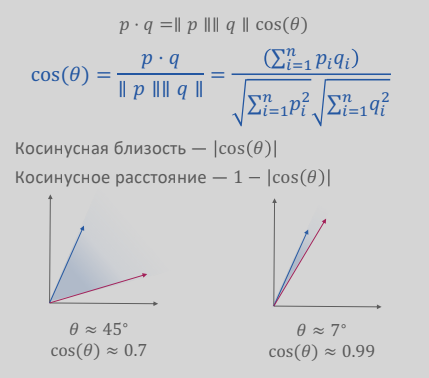

Длина вектора может зависеть от модели, которой этот вектор был построен. Тогда, например, Евклидово расстояние будет большим, но с косинусным все хорошо

## Визуализация

https://projector.tensorflow.org/

## Оценка эмбеддингов

### Intrinsic

#### SimLex-999

[SimLex-999](https://fh295.github.io/simlex.html) 

Обеспечивает способ измерения того, насколько хорошо модели отражают сходство, а не родство или ассоциацию.

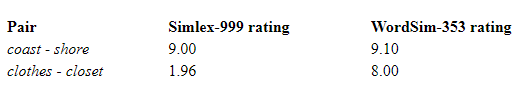

(coast\shore - берег, closet - шкаф, clothes - одежда)

#### wordsim353

[wordsim353](http://alfonseca.org/eng/research/wordsim353.html)

Оценивает сходство/связность слов

## Doc2Vec

[gensim Doc2Vec](https://radimrehurek.com/gensim/models/doc2vec.html)

In [ ]:
from gensim.models.doc2vec import TaggedDocument, Doc2Vec

In [ ]:
#prepare dataset
def create_tagged_document(list_of_list_of_words):
    for i, list_of_words in enumerate(list_of_list_of_words):
        yield TaggedDocument(list_of_words, [i])

train_data = list(create_tagged_document(data))
print(train_data[:1])

In [ ]:
%%time

model = Doc2Vec(vector_size=50, min_count=1, epochs=40)
model.build_vocab(train_data)
model.train(train_data, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
print(model.infer_vector('gensim is really awesome'.split(' ')))

## Что еще почитать

[Topic Modeling with LSA, PLSA, LDA & lda2Vec](https://medium.com/nanonets/topic-modeling-with-lsa-psla-lda-and-lda2vec-555ff65b0b05)

[Matrix decompositions and latent semantic indexing](https://nlp.stanford.edu/IR-book/pdf/18lsi.pdf)

_______


[Word2Vec: покажи мне свой контекст, и я скажу, кто ты](https://sysblok.ru/knowhow/word2vec-pokazhi-mne-svoj-kontekst-i-ja-skazhu-kto-ty/)

[Чудесный мир Word Embeddings: какие они бывают и зачем нужны?](https://habr.com/ru/company/ods/blog/329410/)

[Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/abs/1301.3781)

[Distributed Representations of Words and Phrases and their Compositionality](https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf)

[word2vec Explained: Deriving Mikolov et al.’s Negative-Sampling Word-Embedding Method](https://arxiv.org/pdf/1402.3722v1.pdf) 

[Word2Vec: классификация текстовых документов](https://habr.com/ru/post/277563/)

[Пирожки в дистрибутивной семантике](https://habr.com/ru/post/275913/)

[FastText: рецепт работы по коду](https://habr.com/ru/post/492432/)

[FastText: stepping through the code](https://medium.com/@mariamestre/fasttext-stepping-through-the-code-259996d6ebc4)


[Distributed Representations of Sentences and Documents](https://arxiv.org/pdf/1405.4053v2.pdf)

___

[Word2Vec Model Tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py)

[FastText Model Tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_fasttext.html#sphx-glr-auto-examples-tutorials-run-fasttext-py)

[Comparison of FastText and Word2Vec](https://github.com/RaRe-Technologies/gensim/blob/ba1ce894a5192fc493a865c535202695bb3c0424/docs/notebooks/Word2Vec_FastText_Comparison.ipynb)

___

[4 NLP Libraries for Automatic Language Identification of Text Data In Python](https://towardsdatascience.com/4-nlp-libraries-for-automatic-language-identification-of-text-data-in-python-cbc6bf664774)

[Stanza Language Identification](https://stanfordnlp.github.io/stanza/langid.html)


[Paper with code - Language Identification ](https://paperswithcode.com/task/language-identification)

